# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [5]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_outlier import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_2D, plotting
import pandas as pd
from sklearn.metrics import adjusted_rand_score, rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_2d_dataset

          0         1
0  1.627199  3.296342
1  3.436618  3.027574
2  4.359538  3.232653
3  4.266793  2.741403
4  2.905252  3.512543


D:\vtdo\projects\evclust\src\evclust\utils.py:1089: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


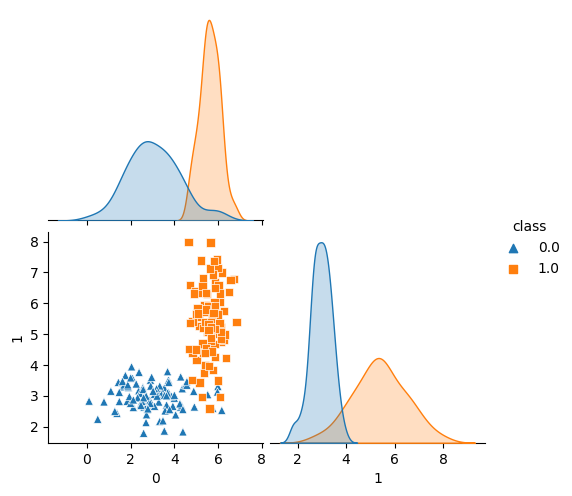

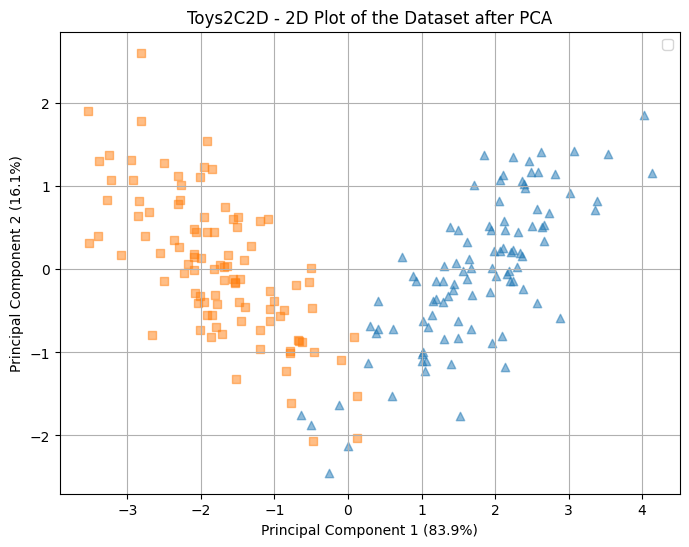

In [6]:
## Generating data set
df_wt_label = load_2d_dataset()
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [7]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541, 153.8469053159541]
ARI values: [0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297, 0.8456245542938297]
NS values: [0.8256583139080468, 0.8256583139080468, 0.8175838584037569, 0.8175838584037569, 0.8256583139080468, 0.8175838584037569, 0.8256583139080468, 0.8256583139080468, 0.8256583139080468, 0.8256583139080468]
NMI values: [0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582, 0.7594266036838582]
Average ARI values: 0.8456245542938297
Average Non-specificity: 0.8232359772567598
Average Normalized mutual infor: 0.7594266036838582
Center: [[2.82085628 2.882

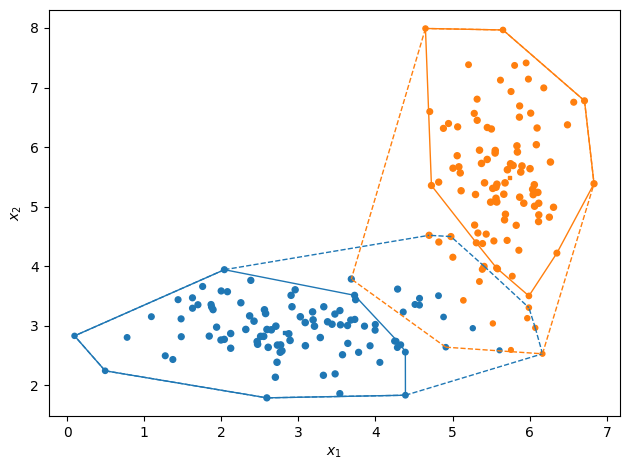

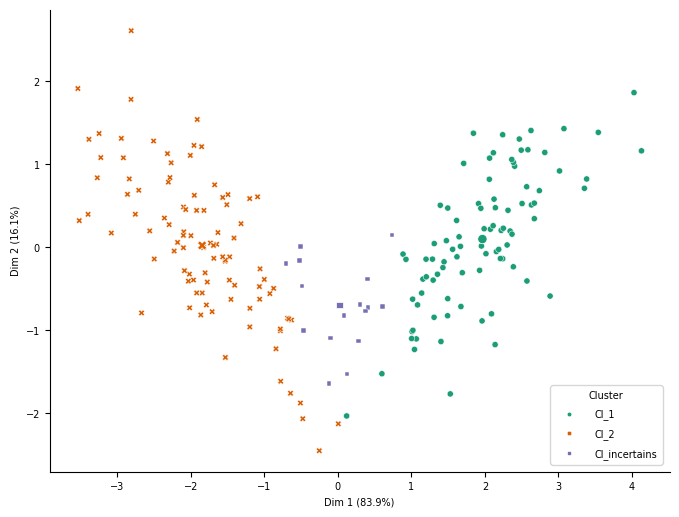

In [8]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

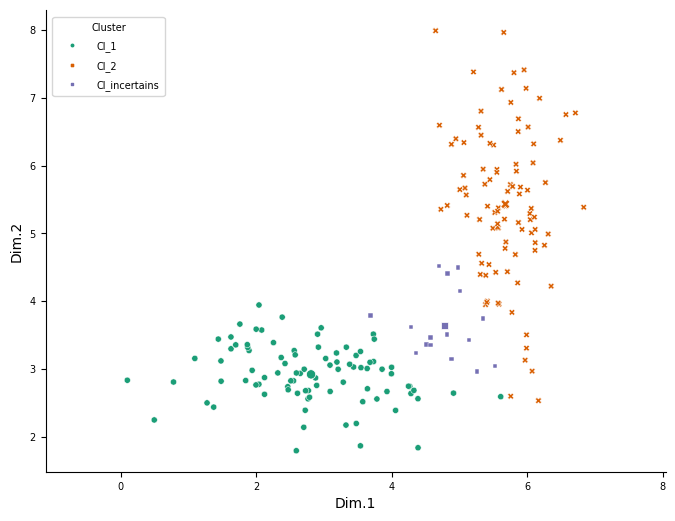

In [9]:
ev_plot_2D(data=dataset[:, :-1], x=model_list[0], normalize=False, cex=20)

## Weighted ECM (WECM)

In [10]:
%%capture
model_list = np.array([])
c = 2
d = X.shape[1]
delta = np.sqrt(20)
W = np.ones((c, d)) * (1/d)
for i in range(10):
    model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, stopping_factor="center", init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]


J values: [23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719, 23.51000606122719]
ARI values: [0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614, 0.9020080211756614]
NS values: [0.6948479027118434, 0.7334918882839665, 0.6948479027118434, 0.6948479027118434, 0.7334918882839665, 0.6948479027118434, 0.7334918882839665, 0.7334918882839665, 0.7334918882839665, 0.6948479027118434]
NMI values: [0.8380801143026412, 0.8380801143026411, 0.8380801143026412, 0.8380801143026412, 0.8380801143026411, 0.8380801143026412, 0.8380801143026411, 0.8380801143026411, 0.8380801143026411, 0.8380801143026412]
Average ARI values: 0.9020080211756613
Average Non-specificity: 0.714169895497905
Average Normalized mutual infor: 0.8380801143026411


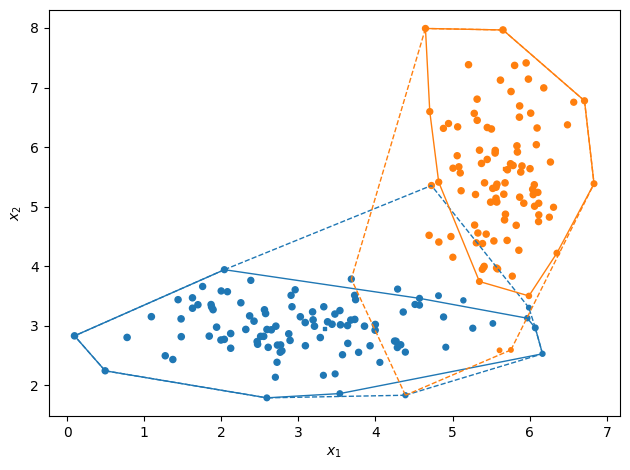

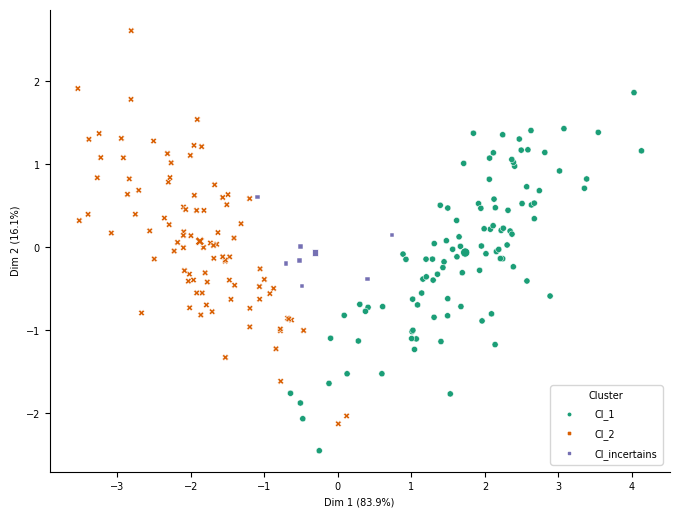

In [11]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

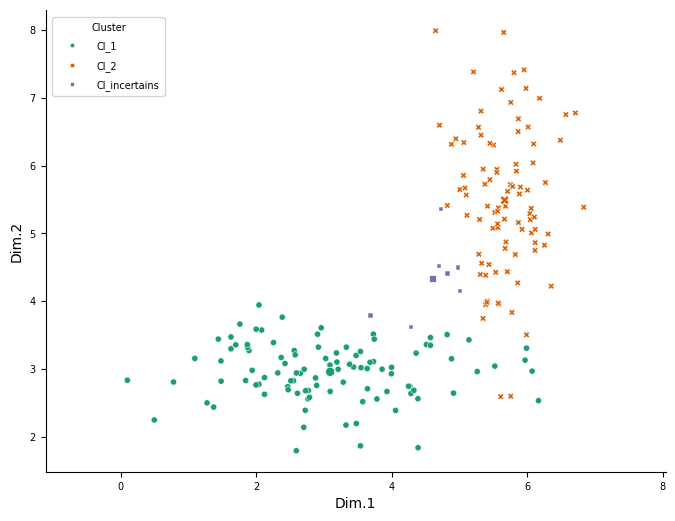

In [12]:
ev_plot_2D(data=dataset[:, :-1], x=model_list[0], normalize=False, cex=20)

In [13]:
top_weights = [model['W'] for model in model_list]
for W in top_weights:
    print(f"\n{W}")


[[0.08764535 0.91235465]
 [0.87308826 0.12691174]]

[[0.87308826 0.12691174]
 [0.08764535 0.91235465]]

[[0.08764535 0.91235465]
 [0.87308826 0.12691174]]

[[0.08764535 0.91235465]
 [0.87308826 0.12691174]]

[[0.87308826 0.12691174]
 [0.08764535 0.91235465]]

[[0.08764535 0.91235465]
 [0.87308826 0.12691174]]

[[0.87308826 0.12691174]
 [0.08764535 0.91235465]]

[[0.87308826 0.12691174]
 [0.08764535 0.91235465]]

[[0.87308826 0.12691174]
 [0.08764535 0.91235465]]

[[0.08764535 0.91235465]
 [0.87308826 0.12691174]]
